<!--start-block-->
<hr style="height: 1px;">
<i>This notebook was authored by the 8.316 Course Team, Copyright 2023 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>PSet 4: Simulation</h1>

<br>

<!--start-block MIT color #A31F34-->
<a name='section_4_0'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P4.0 Overview</h2>

<h3>Navigation</h3>
          
<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_1">P1.1 Random Variables and Probability Density Functions</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_1">P1.1 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_2">P1.2 Gaussian Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_2">P1.2 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_3">P1.3 Joint Probability Density Functions</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_3">P1.3 Problems</a></td>
   </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_4">P1.4 Poisson Distribution</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_4">P1.4 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_5">P1.5 Simulating a Poisson Process</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_5">P1.5 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_1_6">P1.6 Exponential Distribution (Optional)</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_1_6">P1.6 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_1">P1.7 Error Propagation - A Simple Example</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_2_1">P1.7 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_2">P1.8 Error Propagation - A More Complicated Example</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_2_2">P1.8 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_2_3">P1.9 Johnson Noise</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_2_3">P1.9 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_1">P1.10 Frequency Analysis</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_1">P1.10 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_2">P1.11 The Discrete Fourier Transform</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_2">P1.11 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_3_3">P1.12 Spectrogram and Q-Transform</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_3_3">P1.12 Problems</a></td>
    </tr>
</table>

<h3>Learning Objectives</h3>

This problem set is aimed at building intuition for the understanding of random variables, and for the application of statistical tools in understanding physics datasets. We will focus on the tools used within the lectures, but here we will expand on them with longer problems that illustrate what's going on. 


In this problem set we will explore the following topics:

- Introduction to random variables and their distributions
- Introduction to the properties of a Gaussian distribution
- Introduction to joint probability distributions of more than one variable
- Introduction to the properties of a Poisson distribution
- Examples of how a Poisson distribution arises in simulated data
- Discussion of why the time between events in a Poisson distribution gives an exponential distribution

2D Ideal Gas Law through Particle Simulation

The goal of this section is to derive macroscopic physical laws microscopic particle level simulation, 
and we will derive famous relations such as Boltzmann distribution, Entropy, Charles' law, Boyle's law, and Ideal gas Relation

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [ ]:
%matplotlib inline
import itertools
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [4]:
#>>>RUN: P1.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<!--start-block-->
<a name='section_4_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P4.1 Obtaining Maxwell-Boltzmann distribution from Molecular Simulation</h2>

| [Top](#section_4_0) | [Problems](#exercises_4_1) | [Next Section](#section_4_2) |

<h3>Overview</h3>


Maxwell-Boltzmann Distribution
Let's look at the final velocity distribution of the particles and compare it to Maxwell-Boltzmann in 2 Dimensions:

* $kT = KE_{avg} = \frac{1}{2}m\bar{v^2} \implies \boxed{\frac{m}{kT} = \frac{2}{\bar{v^2}}}$
* $\boxed{f(v) = \frac{m}{kT} v \exp\left(-\frac{m}{kT}\frac{v^2}{2} \right)}$

<u>Definition:</u> The <b>joint PDF</b> for two continuous random variables $X$ and $Y$ is a function $P(x, y)$ defined so that the probability of the random values $X$ and $Y$ being in a particular region $RG$ in $x-y$ space is given by</p>

$$p((X, Y)\in RG) = \iint_{RG} P(x, y) dx dy$$

Note that we don't explicitly define ranges for the $x$ and $y$ integrals because there is no requirement in this definition that $RG$ be a rectangle in $x-y$ space.

We define the single variable PDFs $P(x)$ and $P(y)$ by integrating (also called marginalizing) the extra variable from the joint PDF, i.e., 

$$P(x) = \int_{-\infty}^{\infty} P(x,y) dy$$ and $$P(y) = \int_{-\infty}^{\infty} P(x,y) dx$$


(Here, we implicitly assume that the possible values of $X$ and $Y$ are the whole real number line.)

Now, we can introduce another very useful term in statistics: independence. Conceptually, two random variables are independent if measuring one tells you nothing about the possible values you will get when measuring the other. Mathematically, this means:


<u>Definition:</u> Two random variables $X$ and $Y$ are <b>independent</b> from one another if the joint PDF factors into the product of the two single-variable PDFs:</i>

$$P(x, y) = P(x) P(y).$$

In [3]:
# BOX SIZE 1 by 1 in 2 dimensions

Setup

In [15]:
n_particles = 30
pos_initial = np.random.rand(n_particles, 2)
particle_radius = 0.005

In [6]:
vel_initial = np.zeros((n_particles,2))
vel_initial[ixr, 0] = -500
vel_initial[ixl, 0] = 500
vel_initial[:, 1] = 0


In [7]:
#indices = np.arange(0,n_particles,1)
#idx_pair = np.array(list(itertools.combinations(indices,2)))

In [5]:
def distance_pairs(position, idx_pair):
    delta_x = position[:,0][idx_pair][:,0] - position[:,0][idx_pair][:,1]
    delta_y = position[:,1][idx_pair][:,0] - position[:,1][idx_pair][:,1]
    return np.sqrt(delta_x**2 + delta_y**2)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 1.2.1</span>

Elastic Collision with the wall. (Maybe add a diagram)

We know that for elastic collsion of a mass with a wall (stationary infinite mass object), the velocity component perpendicular to the wall flips direction.

Complete the code for `wall_collision`, which takes as input `pos` and `vel` that represents position and velocity vectors of particles, and returns the velocity vectors 
after the collsion with four sides of the wall. 

In [9]:
def wall_collision(pos, vel):
    # Your code goes here. 

    #collsion with the right wall 
    vel[pos[:, 0] > 1, 0] = -np.abs(vel[pos[:, 0] > 1, 0])

    #collision with the left wall 
    vel[pos[:, 0] < 0, 0] = np.abs(vel[pos[:, 0] < 0, 0])

    #collision with the top wall 
    vel[pos[:, 1] > 1, 1] = -np.abs(vel[pos[:, 1] > 1, 1])

    #collsion with the bottom wall 
    vel[pos[:, 1] < 0, 1] = np.abs(vel[pos[:, 1] < 0, 1])
    return vel 

Let's run a simulation of a single particle bouncing off four side of the walls using the above code you completed. 

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 4.1.1</span>

Elastic Collsion of Particles. 

When two particles get closer 2 times the radius of the particle, we should perform elastic collision of particles. 

So at each iteration of the simulation, we will evaluate `d_pairs`, and if any of the distances between particles is less than $2r$, then a collision occurs. What is the final velocity of each of the two spheres? In an elastic collision (conservation of energy + momentum + angular momentum), one can show

$$\vec{v}_1^{\text{new}} = \vec{v}_1 - \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{r}_1 - \vec{r}_2)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_1 - \vec{r}_2)$$
$$\vec{v}_2^{\text{new}} = \vec{v}_2 - \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{r}_2 - \vec{r}_1)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_2 - \vec{r}_1)$$

You can use your function in the ungraded "follow-up" part of this problem.

Complete the code for `pair_collsion`, which takes as input `pos_1i`, `pos_2i`, `vel_1i` and `vel_2i` that represents position and velocity vectors of particles, and returns the velocity vectors 
after the collsion with four sides of the wall. 

In [7]:
def pair_collision(pos_1i, pos_2i, vel_1i, vel_2i):
    #print(pos_1i.shape, pos_2i.shape, vel_1i.shape, vel_2i.shape)
    #print(np.sum(pos_1i-pos_2i[:] * vel_1i-vel_2i[:], axis=1).shape)
    #print(np.sum((pos_1i-pos_2i)**2, axis=1).shape)
    vel_1f = vel_1i - (np.sum( (pos_1i-pos_2i) * (vel_1i-vel_2i),axis=1)/np.sum((pos_1i-pos_2i)**2, axis=1)).T @ (pos_1i - pos_2i)
    vel_2f = vel_2i - (np.sum( (pos_1i-pos_2i) * (vel_1i-vel_2i),axis=1)/np.sum((pos_1i-pos_2i)**2, axis=1)).T @ (pos_2i - pos_1i)
    
    #vel_1f = vel_1i - (np.sum( (pos_1i-pos_2i) * (vel_1i-vel_2i),axis=1)/(np.ones(pos_1i.shape[0])*4*particle_radius*particle_radius)) @ (pos_1i - pos_2i)
    #vel_2f = vel_2i - (np.sum( (pos_1i-pos_2i) * (vel_1i-vel_2i),axis=1)/(np.ones(pos_1i.shape[0])*4*particle_radius*particle_radius)) @ (pos_2i - pos_1i)
    #print(np.sum((pos_1i-pos_2i)**2, axis=1))
    #print((pos_1i - pos_2i))
    
    #print(vel_1f.shape)
    #print(vel_1f.shape)
    return vel_1f, vel_2f



    

In [6]:
def which_pair_collides(distance_pairs):
    #return np.where(distance_pairs < 2*particle_radius)[0]
    return distance_pairs < 2*particle_radius

In [7]:
#Implement this part, when collisions happen
#Elastic Collsion

In [8]:
np.array([1, 2])/np.array([5, 2])

array([0.2, 1. ])

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 1.2.1</span>

Define a Gaussian function named `gauss_mu_sigma` (not using functions from scipy.stats), that takes 3 inputs: a single value or array of numbers `x`, the variable `mu`, and the variable `sigma`. Note that this function should work properly when `x` is a 1D numpy array. The function should be equal to:

$$P(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)$$

You can use your function in the ungraded "follow-up" part of this problem.

In [8]:
#pair_collision(pos_initial[idx_pair[wpc][:,0]], pos_initial[idx_pair[wpc][:,1]],vel_initial[idx_pair[wpc][:,0]],vel_initial[idx_pair[wpc][:,1]])

In [11]:
def simulate(pos, vel, time_steps, dt, save_interval):

    
    nparticles = pos.shape[0]
    indices = np.arange(0,n_particles,1)
    idx_pair = np.array(list(itertools.combinations(indices,2)))

    
    pos_simulated = np.zeros((time_steps//save_interval + 1, n_particles, 2))
    vel_simulated = np.zeros((time_steps//save_interval + 1, n_particles, 2))


    
    # Initial State
    save_index = 0
    
    pos_simulated[save_index] = pos
    vel_simulated[save_index] = vel
    
    for i in range(1,time_steps):
        #print("first")
        #print(vel)

        collision_idx = which_pair_collides(distance_pairs(pos, idx_pair))
        #print(collision_idx)
        v1f, v2f = pair_collision(pos[idx_pair[collision_idx][:,0]], pos[idx_pair[collision_idx][:,1]],
                                  vel[idx_pair[collision_idx][:,0]], vel[idx_pair[collision_idx][:,1]])

        vel[idx_pair[collision_idx][:,0]] = v1f
        vel[idx_pair[collision_idx][:,1]] = v2f
        #print("second")
        #print(vel)
        
        vel = wall_collision(pos, vel)
        #print("third")
        #print(vel)
        pos = pos + vel * dt
        
        if (i%save_interval == 0):
            save_index += 1
            vel_simulated[save_index] = vel
            pos_simulated[save_index] = pos

    pos_simulated[-1] = pos
    vel_simulated[-1] = vel
    return pos_simulated, vel_simulated

In [15]:
pos_sim, vel_sim = simulate(pos_initial, vel_initial, 8000, 0.0001)

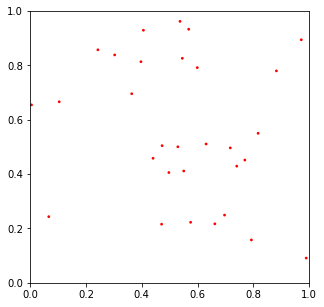

In [16]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = pos_initial[:,0], pos_initial[:,1]
circles_red = [plt.Circle((xi, yi), radius=particle_radius, linewidth=0) for xi,yi in zip(xred,yred)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
ax.add_collection(cred)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

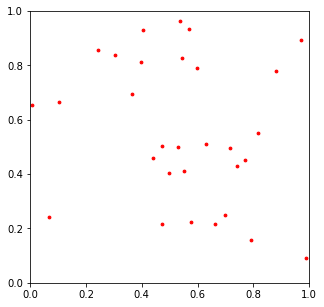

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.clear()
vmin = 0
vmax = 1
ax.set_xlim(0,1)
ax.set_ylim(0,1)
markersize = 2 * particle_radius * ax.get_window_extent().width  / (vmax-vmin) * 72./fig.dpi
red, = ax.plot([], [], 'o', color='red', markersize=markersize)
#blue, = ax.plot([], [], 'o', color='blue', markersize=markersize)

def animate(i):
    xred, yred = pos_sim[i][:,0], pos_sim[i][:,1]
    #xblue, yblue = pos_sim[i][:,0], pos_sim[i][:,1]
    red.set_data(xred, yred)
    #print(red)
    return [red]
    #blue.set_data(xblue, yblue)
    #return red, blue

#writer = animation.FFMpegWriter(fps=30)
#ani = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)
#ani.save('ani3.mp4',writer=writer,dpi=100)

ani = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)

In [18]:
HTML(ani.to_jshtml())


In [18]:
n_particles = 400
pos_initial = np.random.rand(n_particles, 2)

#ixa = pos_initial[:,0]>0.5 #right
#ixb = pos_initial[:,0]<=0.5 #left



particle_radius = 0.0002


In [19]:
indices = np.arange(0,n_particles,1)
idx_pair = np.array(list(itertools.combinations(indices,2)))
collision_idx = which_pair_collides(distance_pairs(pos_initial, idx_pair))

In [20]:
np.where(collision_idx==True)

(array([], dtype=int64),)

In [21]:
pos_initial_removed = np.delete(pos_initial, idx_pair[collision_idx][:,0], axis=0)

In [212]:
n_particles = pos_initial_removed.shape[0]

In [213]:
vel_initial = np.zeros((n_particles,2))
thetas = np.random.rand(n_particles)* 2 * np.pi
vel_initial[:, 0] = np.cos(thetas) * 500
vel_initial[:, 1] = np.sin(thetas) * 500



In [202]:
pos_sim, vel_sim = simulate(pos_initial_removed, vel_initial, 40000, 0.0000008, 1)

In [203]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Text(0, 0.5, '# Particles')

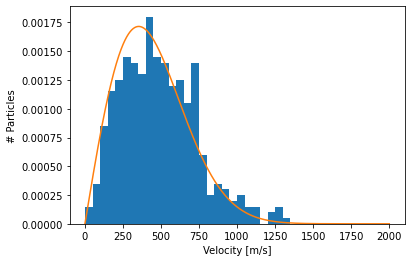

In [204]:

bins = np.linspace(0,2000,41)
plt.figure()
plt.hist(np.sqrt(np.sum(vel_sim[-1]**2, axis=1)), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')



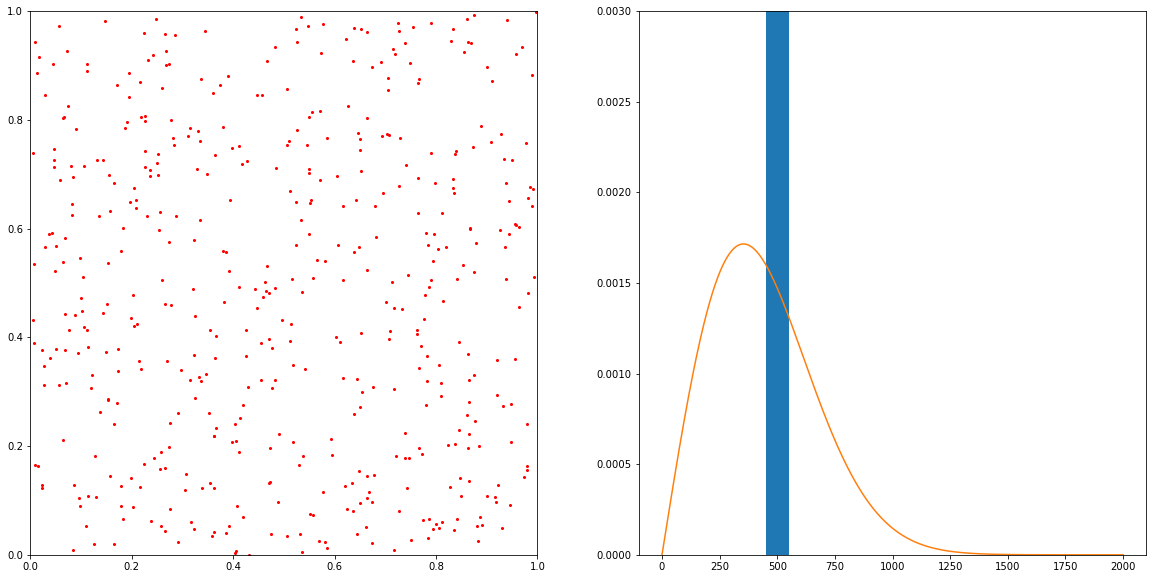

In [195]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].clear()
vmin = 0
vmax = 1
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,1)
markersize = 10*2 * particle_radius * axes[0].get_window_extent().width  / (vmax-vmin) * 72./fig.dpi
red, = axes[0].plot([], [], 'o', color='red', markersize=markersize)
n, bins, patches = axes[1].hist(np.sqrt(np.sum(vel_sim[0]**2, axis=1)), bins=bins, density=True)
axes[1].plot(v,fv)
axes[1].set_ylim(top=0.003)

def animate(i):
    xred, yred = pos_sim[i][:,0], pos_sim[i][:,1]
    red.set_data(xred, yred)
    hist, _ = np.histogram(np.sqrt(np.sum(vel_sim[i]**2, axis=1)), bins=bins, density=True)
    for i, patch in enumerate(patches):
        patch.set_height(hist[i])
    return [red]

ani_hist = animation.FuncAnimation(fig, animate, frames=range(0,40000,500), interval=200, blit=True)


In [193]:
HTML(ani_hist.to_jshtml())


<!--start-block-->
<a name='section_4_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P4.2 Ideal Gas Law</h2>

| [Top](#section_4_0) | [Previous Section](#section_4_1) | [Problems](#exercises_4_3) | [Next Section](#section_4_3) |

<h3>Overview</h3>

Now with the setup we just completed, we will derive ideal gas relations. 
Two component, Boyle's law and Charles's law and Gay-Lussac's law. 
Combining all of them gives the ideal gas law. 
We will confirm each of them through molecular simulation. 

Maxwell-Boltzmann Distribution
Let's look at the final velocity distribution of the particles and compare it to Maxwell-Boltzmann in 2 Dimensions:

* $kT = KE_{avg} = \frac{1}{2}m\bar{v^2} \implies \boxed{\frac{m}{kT} = \frac{2}{\bar{v^2}}}$
* $\boxed{f(v) = \frac{m}{kT} v \exp\left(-\frac{m}{kT}\frac{v^2}{2} \right)}$

<u>Definition:</u> The <b>joint PDF</b> for two continuous random variables $X$ and $Y$ is a function $P(x, y)$ defined so that the probability of the random values $X$ and $Y$ being in a particular region $RG$ in $x-y$ space is given by</p>

$$p((X, Y)\in RG) = \iint_{RG} P(x, y) dx dy$$

Note that we don't explicitly define ranges for the $x$ and $y$ integrals because there is no requirement in this definition that $RG$ be a rectangle in $x-y$ space.

We define the single variable PDFs $P(x)$ and $P(y)$ by integrating (also called marginalizing) the extra variable from the joint PDF, i.e., 

$$P(x) = \int_{-\infty}^{\infty} P(x,y) dy$$ and $$P(y) = \int_{-\infty}^{\infty} P(x,y) dx$$


(Here, we implicitly assume that the possible values of $X$ and $Y$ are the whole real number line.)

Now, we can introduce another very useful term in statistics: independence. Conceptually, two random variables are independent if measuring one tells you nothing about the possible values you will get when measuring the other. Mathematically, this means:


<u>Definition:</u> Two random variables $X$ and $Y$ are <b>independent</b> from one another if the joint PDF factors into the product of the two single-variable PDFs:</i>

$$P(x, y) = P(x) P(y).$$

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 1.2.1</span>

Write a function named `compute_delta_v` that takes 3 inputs: a velocity before collsion with the wall `vel_i`, the velocity after collision `vel_f`, and then the sum of the change of magnitude of all the collsions with the wall. 

$$\sum |\Delta v|$$

You can use your function in the ungraded "follow-up" part of this problem.

In [ ]:
#Now let's edit our simulation to also keep track of delta v

In [241]:
a = np.array([1,2])
def func(b):
    b[1]+=1;
    return b;

In [251]:
c = a.copy()
print(c - func(a))

[ 0 -1]


In [249]:
c = a.copy()

In [250]:
c

array([1, 6])

In [244]:
a - func(a)

array([0, 0])

In [10]:
def simulate(pos, vel, time_steps, dt, save_interval):

    
    nparticles = pos.shape[0]
    indices = np.arange(0,n_particles,1)
    idx_pair = np.array(list(itertools.combinations(indices,2)))

    
    pos_simulated = np.zeros((time_steps//save_interval + 1, n_particles, 2))
    vel_simulated = np.zeros((time_steps//save_interval + 1, n_particles, 2))

    dv = np.zeros((time_steps//save_interval + 1))

    
    # Initial State
    save_index = 0
    
    pos_simulated[save_index] = pos
    vel_simulated[save_index] = vel
    dv[save_index] = 0
    
    for i in range(1,time_steps):
        #print("first")
        #print(vel)

        collision_idx = which_pair_collides(distance_pairs(pos, idx_pair))
        #print(collision_idx)
        v1f, v2f = pair_collision(pos[idx_pair[collision_idx][:,0]], pos[idx_pair[collision_idx][:,1]],
                                  vel[idx_pair[collision_idx][:,0]], vel[idx_pair[collision_idx][:,1]])

        vel[idx_pair[collision_idx][:,0]] = v1f
        vel[idx_pair[collision_idx][:,1]] = v2f
        #print("second")
        #print(vel)
        vel_before = vel.copy()
        vel = wall_collision(pos, vel)
        dv_ = np.sum(np.abs(vel_before - vel))
        #print(dv_)
        #print("third")
        #print(vel)
        pos = pos + vel * dt
        
        if (i%save_interval == 0):
            save_index += 1
            vel_simulated[save_index] = vel
            pos_simulated[save_index] = pos
            dv[save_index] = dv_

    pos_simulated[-1] = pos
    vel_simulated[-1] = vel
    return pos_simulated, vel_simulated, dv

In [11]:
pos_sim, vel_sim, dv_sim = simulate(pos_initial_removed, vel_initial, 40000, 0.0000008, 1)

NameError: name 'pos_initial_removed' is not defined

In [12]:
dv_sim

NameError: name 'dv_sim' is not defined

In [13]:
plt.plot(dv_sim[30000:31000])

NameError: name 'dv_sim' is not defined

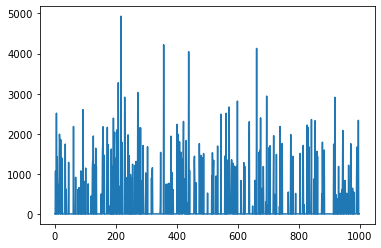

In [261]:
plt.plot(dv_sim[32000:33000])

In [263]:
npoints = 2000

In [23]:
npoints = 2000
for v_magnitude in [300,400,500]:
    vel_initial = np.zeros((n_particles,2))
    thetas = np.random.rand(n_particles)* 2 * np.pi
    vel_initial[:, 0] = np.cos(thetas) * v_magnitude
    vel_initial[:, 1] = np.sin(thetas) * v_magnitude
    pos_sim, vel_sim, dv_sim = simulate(pos_initial_removed, vel_initial, 40000, 0.0000008, 1)
    pressure = np.sum(dv_sim[-npoints:])/(6 * 0.0000008 * npoints)
    print(pressure)

12068334.259542825
23478178.76457216
37822836.201244324


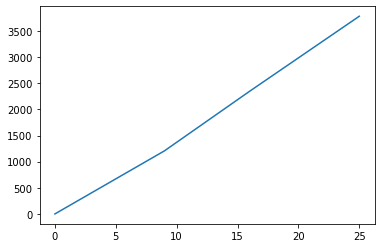

In [26]:
plt.plot([0,9, 16, 25], [0,1207, 2348, 3782])

In [ ]:
v_magnitude = 500
vel_initial = np.zeros((n_particles,2))
thetas = np.random.rand(n_particles)* 2 * np.pi
vel_initial[:, 0] = np.cos(thetas) * v_magnitude
vel_initial[:, 1] = np.sin(thetas) * v_magnitude



In [ ]:
pos_sim, vel_sim, dv_sim = simulate(pos_initial_removed, vel_initial, 40000, 0.0000008, 1)

In [264]:
np.sum(dv_sim[-npoints:])

620506.2870956544

In [ ]:
# by fitting you get the slope (slope, error propagation makes it unusuable> what am i thinking of, maybeLHCO)

In [148]:
# With this simple code we can replicate the Boltzmann distribution

In [99]:
n_particles = 300
pos_initial = np.random.rand(n_particles, 2)

#ixa = pos_initial[:,0]>0.5 #right
#ixb = pos_initial[:,0]<=0.5 #left



particle_radius = 0.0002


In [100]:
indices = np.arange(0,n_particles,1)
idx_pair = np.array(list(itertools.combinations(indices,2)))
collision_idx = which_pair_collides(distance_pairs(pos_initial, idx_pair))

In [101]:
np.where(collision_idx==True)

(array([], dtype=int64),)

In [102]:
pos_initial_removed = np.delete(pos_initial, idx_pair[collision_idx][:,0], axis=0)

In [103]:
n_particles = pos_initial_removed.shape[0]

In [104]:
vel_initial = np.zeros((n_particles,2))
thetas = np.random.rand(n_particles)* 2 * np.pi
vel_initial[:, 0] = np.cos(thetas) * 500
vel_initial[:, 1] = np.sin(thetas) * 500



In [105]:
pos_sim, vel_sim = simulate(pos_initial_removed, vel_initial, 60000, 0.0000008, 1)

In [106]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Text(0, 0.5, '# Particles')

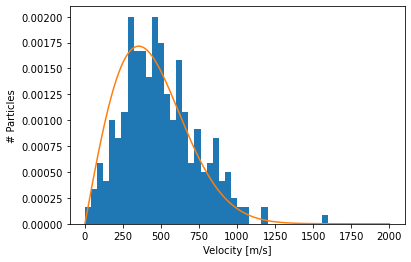

In [108]:

bins = np.linspace(0,2000,51)
plt.figure()
plt.hist(np.sqrt(np.sum(vel_sim[-1]**2, axis=1)), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')



In [134]:
n_particles = 200
pos_initial = np.random.rand(n_particles, 2)

#ixa = pos_initial[:,0]>0.5 #right
#ixb = pos_initial[:,0]<=0.5 #left



particle_radius = 0.0002


In [135]:
vel_initial = np.zeros((n_particles,2))
thetas = np.random.rand(n_particles)* 2 * np.pi
vel_initial[:, 0] = np.cos(thetas) * 500
vel_initial[:, 1] = np.sin(thetas) * 500



In [136]:
pos_sim, vel_sim = simulate(pos_initial, vel_initial, 80000, 0.0000008, 1)

In [137]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Text(0, 0.5, '# Particles')

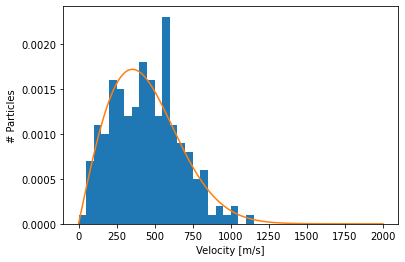

In [138]:

bins = np.linspace(0,2000,41)
plt.figure()
plt.hist(np.sqrt(np.sum(vel_sim[-1]**2, axis=1)), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

